## Load libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import argparse

%matplotlib inline
mpld3.enable_notebook()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from model import *

Using TensorFlow backend.


## Load and explore the driving data in Pandas

In [4]:
df=pd.read_csv('data/driving_log.csv')

In [5]:
len(df)

8036

Plot the distribution of steering angles

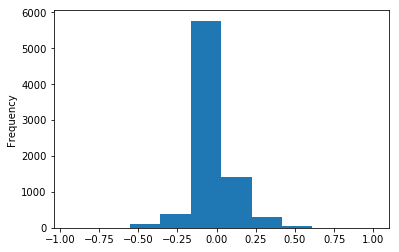

In [6]:
df['steering'].plot.hist()

Plot distribution of steering angle when filtering out values close to 0 (straight)

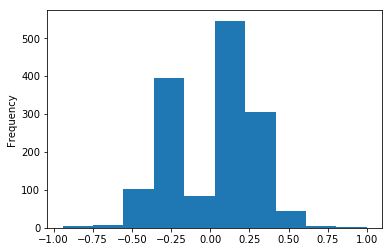

In [7]:
df[abs(df['steering']) > 0.15]['steering'].plot.hist()

Now really load the training data, getting the image files and steering angles

In [8]:
args = argparse.Namespace()

args.logfile = 'data/driving_log.csv'
args.image_directory = 'data'
args.steering_threshold = 0.15
args.steering_correction = 0.25
args.straight_steering_drop_prob = 0.8

In [9]:
image_files, steering = read_training_data(args.logfile, args.image_directory, args.steering_threshold, args.steering_threshold, args.straight_steering_drop_prob)

Inspect the file names 

In [10]:
image_files[0:10]

['data/IMG/center_2016_12_01_13_30_48_287.jpg',
 'data/IMG/left_2016_12_01_13_30_48_287.jpg',
 'data/IMG/right_2016_12_01_13_30_48_287.jpg',
 'data/IMG/center_2016_12_01_13_31_14_194.jpg',
 'data/IMG/left_2016_12_01_13_31_14_194.jpg',
 'data/IMG/right_2016_12_01_13_31_14_194.jpg',
 'data/IMG/center_2016_12_01_13_31_14_500.jpg',
 'data/IMG/left_2016_12_01_13_31_14_500.jpg',
 'data/IMG/right_2016_12_01_13_31_14_500.jpg',
 'data/IMG/center_2016_12_01_13_31_15_106.jpg']

Inspect the steering angles

In [11]:
steering[0:10]

[0.0, 0.15, -0.15, 0.0, 0.15, -0.15, 0.0, 0.15, -0.15, 0.0]

(array([   11.,    33.,   313.,   996.,  3300.,  2341.,  1141.,   180.,
           15.,     4.]),
 array([-1.0926954 , -0.86842586, -0.64415632, -0.41988678, -0.19561724,
         0.0286523 ,  0.25292184,  0.47719138,  0.70146092,  0.92573046,
         1.15      ]),
 <a list of 10 Patch objects>)

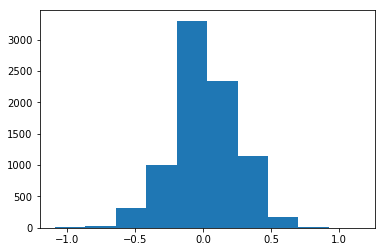

In [12]:
plt.hist(steering)

## Train Model

Set metadata for training run and train the model

Training Samples: 6667
Validation Samples: 1667
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 36, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 37, 48)         43248     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 37, 48)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 33, 64)         36928     
_________________________________________________________________
dropout_2 (Dropout)         

/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not 

Epoch 1/5
208/208 [==============================] - 26s - loss: 0.1113 - acc: 0.1014 - val_loss: 0.0411 - val_acc: 0.1074
Epoch 2/5
208/208 [==============================] - 25s - loss: 0.0378 - acc: 0.1013 - val_loss: 0.0260 - val_acc: 0.1064
Epoch 3/5
208/208 [==============================] - 25s - loss: 0.0300 - acc: 0.1010 - val_loss: 0.0239 - val_acc: 0.1104
Epoch 4/5
208/208 [==============================] - 25s - loss: 0.0279 - acc: 0.1018 - val_loss: 0.0219 - val_acc: 0.1057
Epoch 5/5
208/208 [==============================] - 25s - loss: 0.0262 - acc: 0.1014 - val_loss: 0.0223 - val_acc: 0.1045


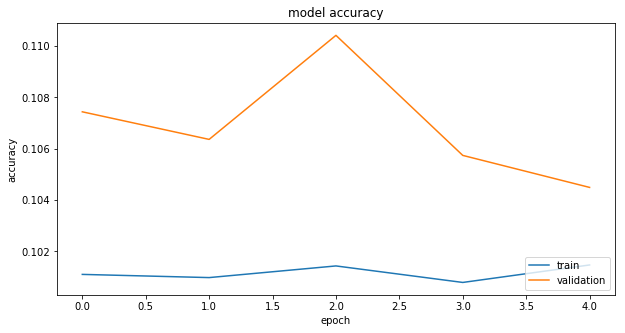

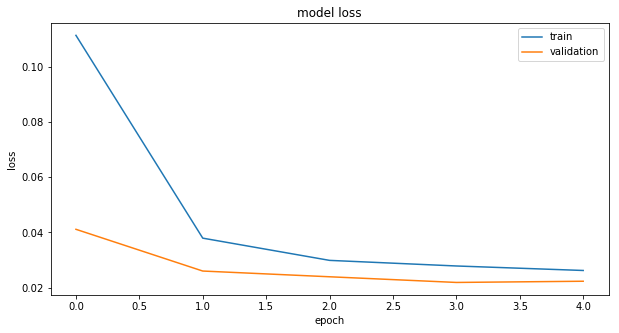

In [13]:
# Image processing params
args.crop = (60,-25,None,None)
args.resize = None

# Model architecture params
# Input height needs to be trimmed by crop amount from (160,320,3)
args.input_shape=(160 - args.crop[0] + args.crop[1], 320, 3)
args.cnn_activation='relu'

# Training params
args.epochs = 5
args.batch_size = 64
args.batch_norm = False
args.validation_split = 0.2

# Output params
args.save_directory = 'model'

(model, history) = train_model(image_files, steering, args)
save_model_files(model, history, args)
plot_training_history(history.history)